AUTO REGRESSIVE Models
Auto-regressive (AR) and moving average (MA) models are popular models that are frequently used for forecasting.

AR and MA models are combined to create models such as auto-regressive moving average (ARMA) and auto-regressive integrated moving average (ARIMA) models.

The initial ARMA and ARIMA models were developed by Box and Jenkins in 1970.

ARMA models are basically regression models; auto-regression means regression of a variable on itself measured at different time periods.

The main assumption of AR model is that the time series data is stationary.

A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time.

http://people.duke.edu/~rnau/411diff.htm

When the time series data is not stationary, then we convert the non-stationary data before applying AR models.

Lags
Taking the difference between consecutive observations is called a lag-1 difference.

The null hypothesis is that time series is non-stationary. Alternative hypothesis is that time series is stationary.

AR Model indentification
Auto-Correlation Function (ACF) or correlogram and Partial Auto-Correlation Function (PACF)
Autocorrelation Function (ACF)
A plot of auto-correlation of different lags is called ACF.

The plot summarizes the correlation of an observation with lag values. The x-axis shows the lag and the y-axis shows the correlation coeﬃcient between -1 and 1 for negative and positive correlation.

Partial Autocorrelation Function (PACF)
A plot of partial auto-correlation for different values of lags is called PACF.

The plot summarizes the correlations for an observation with lag values that is not accounted for by prior lagged observations.

Both plots are drawn as bar charts showing the 95% and 99% conﬁdence intervals as horizontal lines. Bars that cross these conﬁdence intervals are therefore more signiﬁcant and worth noting. Some useful patterns you may observe on these plots are:

The number of lags is p when:

The partial auto-correlation, |$\rho_{pk}$| > 1.96 / $\sqrt{n}$ for first p values and cuts off to zero.
The auto-correlation function, $\rho_k$ decreases exponentially.
* The model is AR of order p when the PACF cuts-off after a lag p.

* The model is MA of order p when the ACF cuts-off after a lag q.

* The model is a mix of AR and MA if both the PACF and ACF trail oﬀ and cuts-off at p and q respectively.

For an ARIMA (p,d,q) process, it becomes non-stationary to stationary after differencing it for d times

In [ ]:
##Import the requred libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv("/content/INFY.NS.csv")

In [ ]:
df.shape

(1235, 7)

In [ ]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,27-08-2018,691.500000,709.974976,690.700012,707.700012,612.051331,7012950
1,28-08-2018,708.599976,719.200012,705.750000,712.349976,616.072937,6496890
2,29-08-2018,716.799988,716.799988,702.575012,705.049988,609.759583,5646496
3,30-08-2018,706.400024,710.775024,698.075012,708.099976,612.397278,11507962
4,31-08-2018,712.549988,727.150024,710.549988,720.549988,623.164734,10875864
5,03-09-2018,724.500000,733.950012,715.000000,717.125000,620.202637,10976328
6,04-09-2018,722.000000,748.500000,716.000000,737.150024,637.521179,15370124
7,05-09-2018,741.950012,744.049988,725.400024,729.900024,631.251038,8658978
8,06-09-2018,732.549988,735.500000,724.099976,727.150024,628.872681,5598659
9,07-09-2018,734.349976,735.150024,723.799988,732.799988,633.759094,6510605


In [ ]:
df_date = df[['Date','Adj Close']]
df_date.head()

,Date,Adj Close
0,27-08-2018,612.051331
1,28-08-2018,616.072937
2,29-08-2018,609.759583
3,30-08-2018,612.397278
4,31-08-2018,623.164734


In [ ]:
rcParams['figure.figsize'] = 15,8

In [ ]:
#Alternate way of reading time series data

dateparse = lambda dates: pd.datetime.strptime(dates, '%d-%m-%Y')
df_final = pd.read_csv('/content/INFY.NS.csv',sep=',', index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)
df_final.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-27,691.500000,709.974976,690.700012,707.700012,612.051331,7012950
2018-08-28,708.599976,719.200012,705.750000,712.349976,616.072937,6496890
2018-08-29,716.799988,716.799988,702.575012,705.049988,609.759583,5646496
2018-08-30,706.400024,710.775024,698.075012,708.099976,612.397278,11507962
2018-08-31,712.549988,727.150024,710.549988,720.549988,623.164734,10875864
2018-09-03,724.500000,733.950012,715.000000,717.125000,620.202637,10976328
2018-09-04,722.000000,748.500000,716.000000,737.150024,637.521179,15370124
2018-09-05,741.950012,744.049988,725.400024,729.900024,631.251038,8658978
2018-09-06,732.549988,735.500000,724.099976,727.150024,628.872681,5598659


In [ ]:
df_new = df_final[['Adj Close']]
df_new1=df_final[['High','Low']]
df_new1.head(10)

,High,Low
Date,,
2018-08-27,709.974976,690.700012
2018-08-28,719.200012,705.750000
2018-08-29,716.799988,702.575012
2018-08-30,710.775024,698.075012
2018-08-31,727.150024,710.549988
2018-09-03,733.950012,715.000000
2018-09-04,748.500000,716.000000
2018-09-05,744.049988,725.400024
2018-09-06,735.500000,724.099976


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2018-08-27 to 2023-08-25
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  1235 non-null   float64
dtypes: float64(1)
memory usage: 19.3 KB


In [ ]:
df_new.describe()

,Adj Close
count,1235.000000
mean,1110.425658
std,404.093103
min,480.234802
25%,663.892944
50%,1222.987671
75%,1467.711670
max,1848.383057


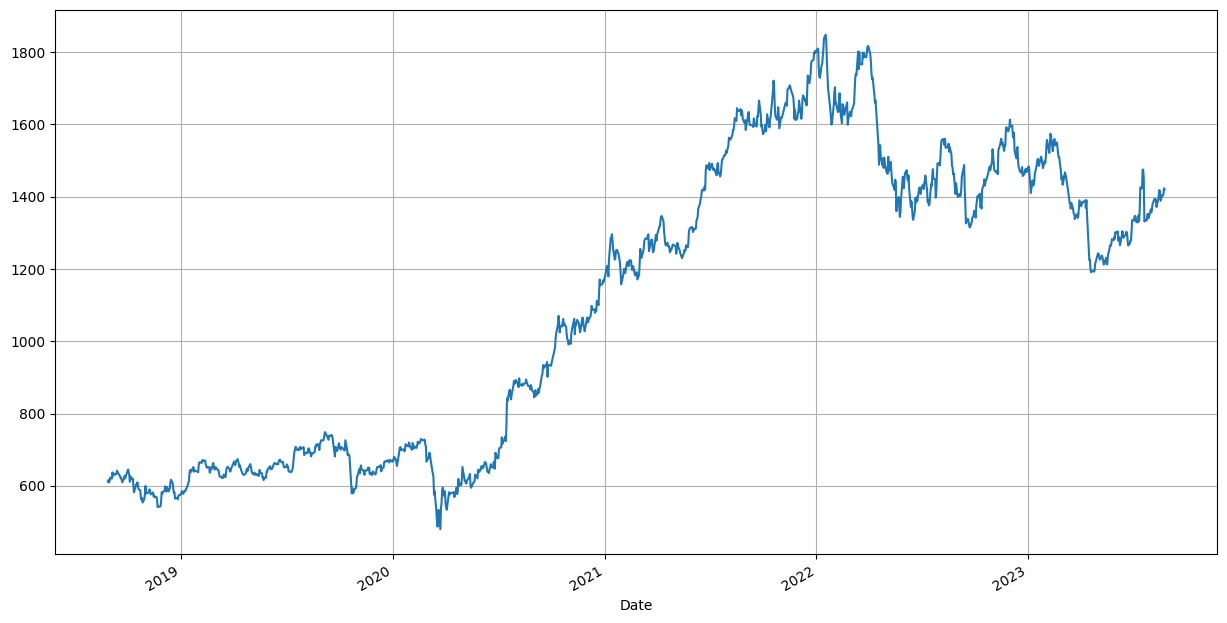

In [ ]:
df_new["Adj Close"].plot()
plt.grid()

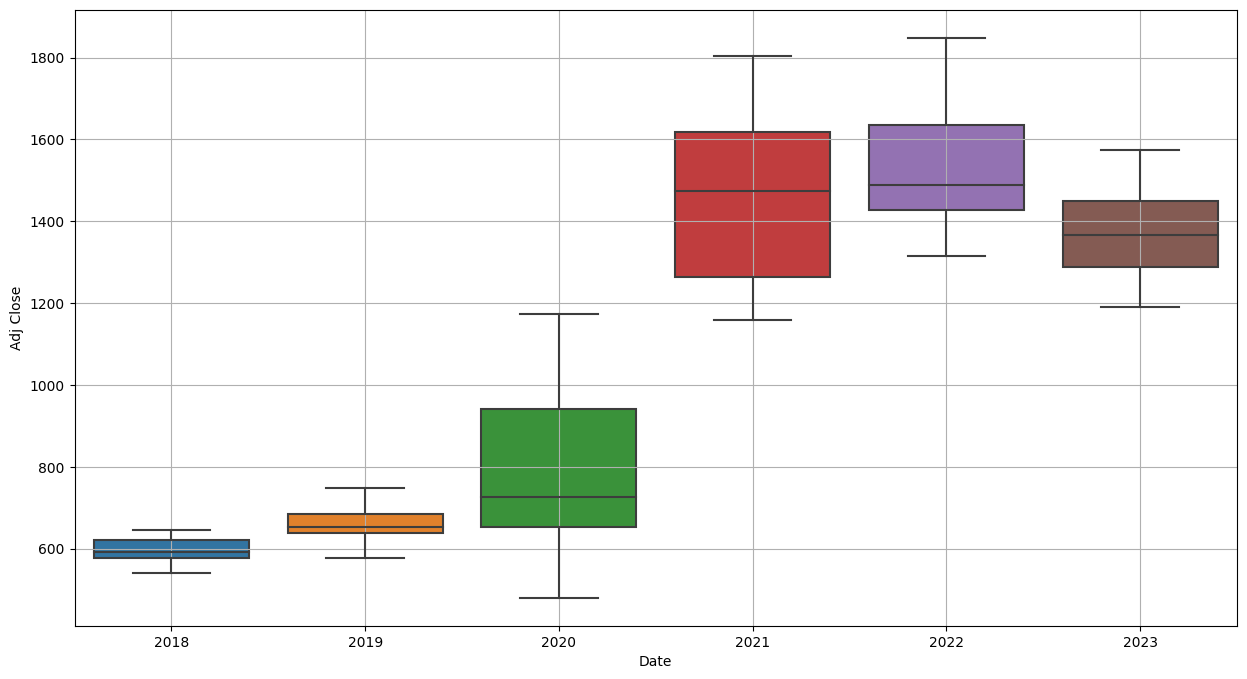

In [ ]:
sns.boxplot(x = df_new.index.year,y = df_final["Adj Close"])
plt.grid()

<Axes: xlabel='Date', ylabel='Adj Close'>

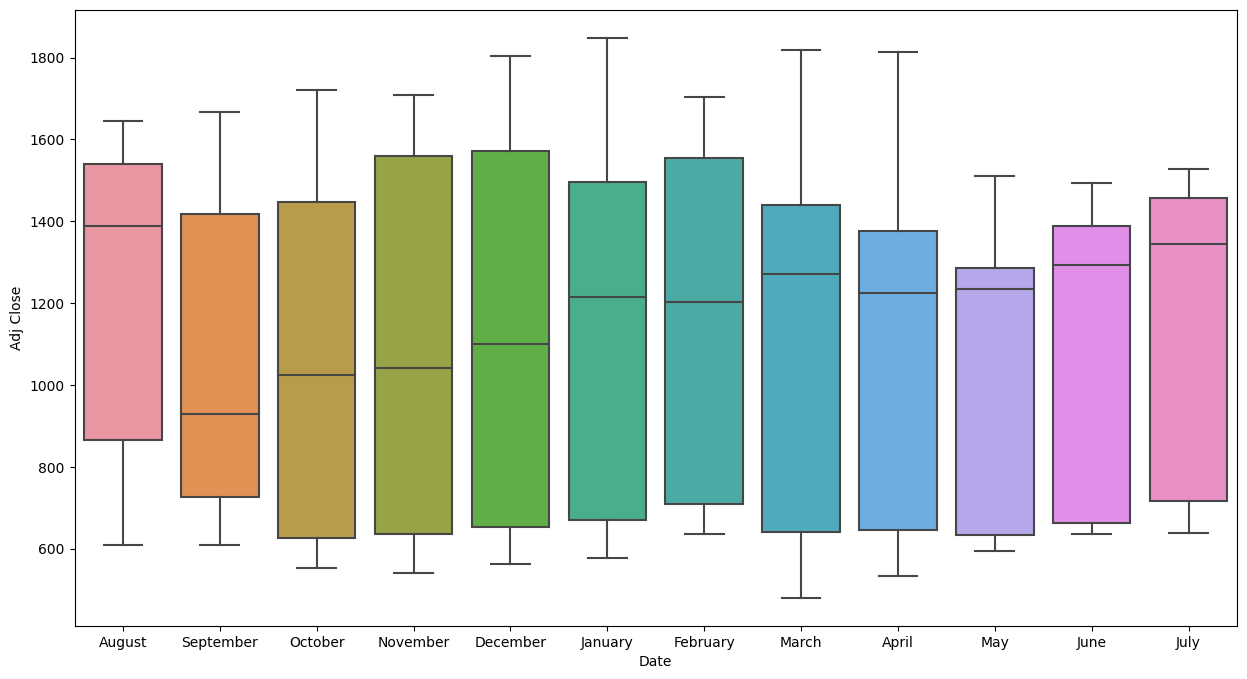

In [ ]:
sns.boxplot(x = df_new.index.month_name(), y =df_new["Adj Close"])

In [ ]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

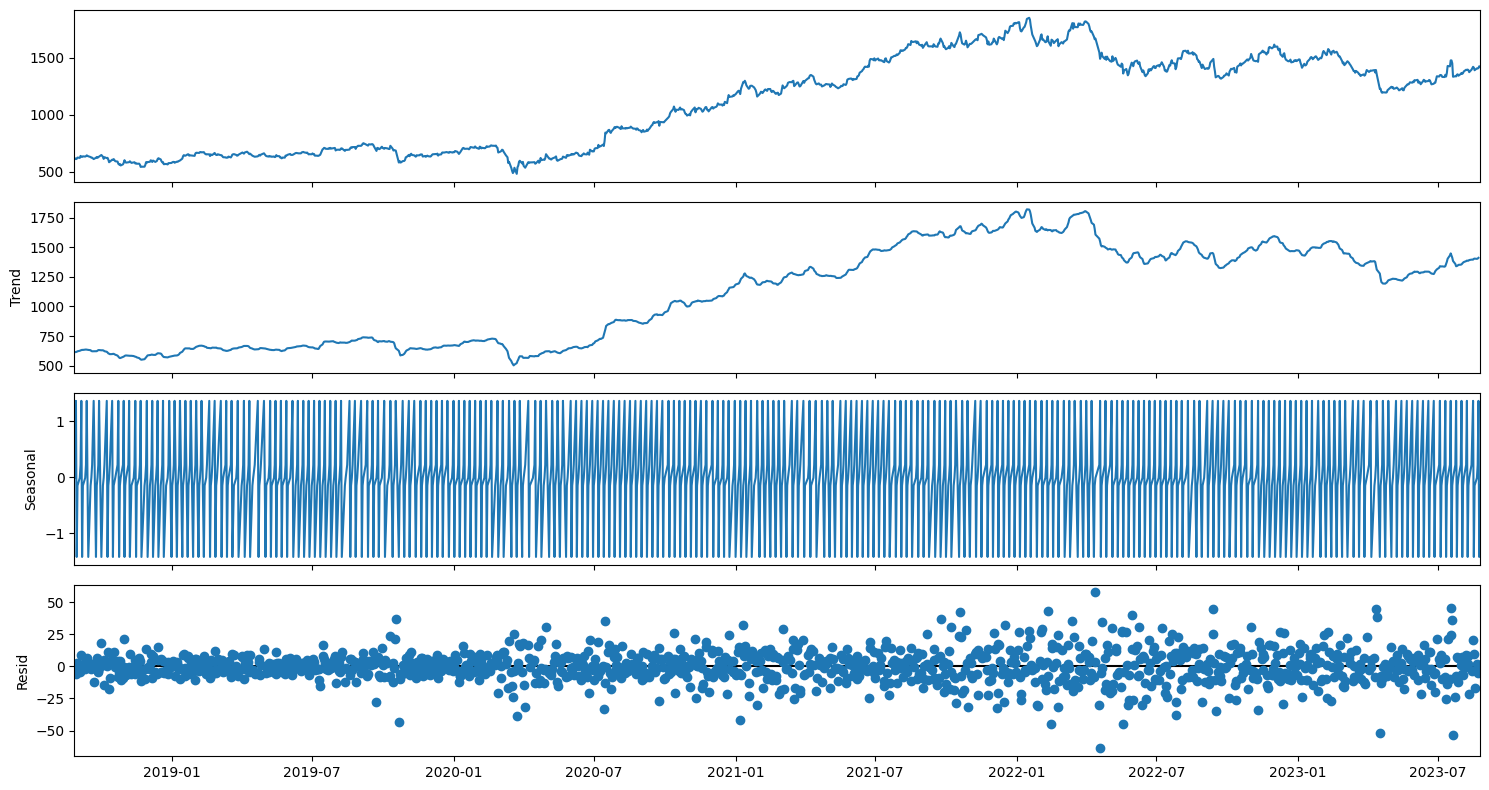

In [ ]:
decomposition = seasonal_decompose(df_new,model='additive',period = 5)
decomposition.plot();

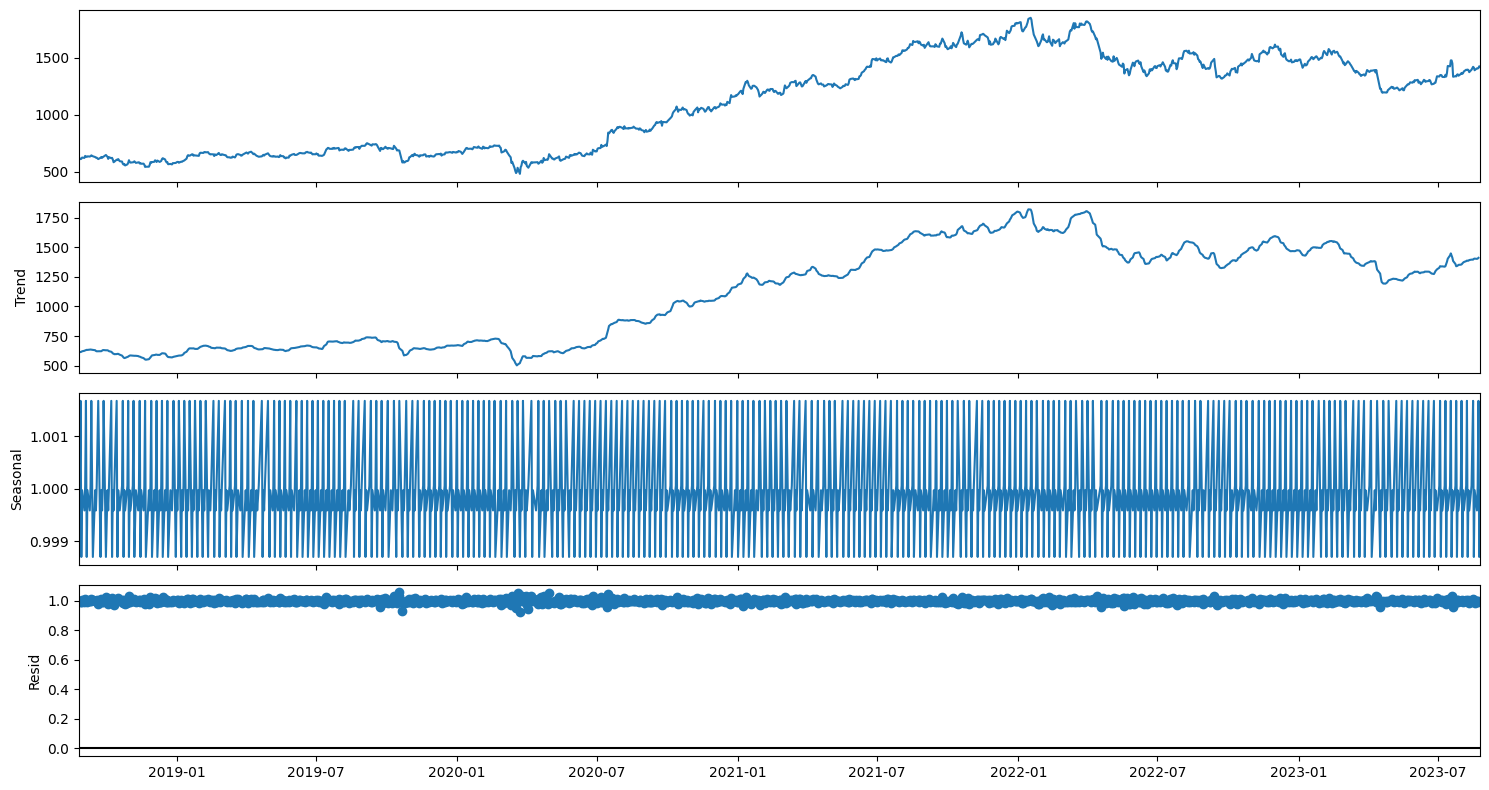

In [ ]:
decomposition = seasonal_decompose(df_new,model='multiplicative',period = 5)
decomposition.plot();

In [ ]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Date
2018-08-27           NaN
2018-08-28           NaN
2018-08-29    614.689173
2018-08-30    616.319434
2018-08-31    620.609082
2018-09-03    624.907373
2018-09-04    628.202454
2018-09-05    630.321326
2018-09-06    632.695300
2018-09-07    632.202319
2018-09-10    634.450940
2018-09-11    635.583862
Name: trend, dtype: float64 

Seasonality 
 Date
2018-08-27    0.999588
2018-08-28    1.000059
2018-08-29    1.001678
2018-08-30    0.998701
2018-08-31    0.999974
2018-09-03    0.999588
2018-09-04    1.000059
2018-09-05    1.001678
2018-09-06    0.998701
2018-09-07    0.999974
2018-09-10    0.999588
2018-09-11    1.000059
Name: seasonal, dtype: float64 

Residual 
 Date
2018-08-27         NaN
2018-08-28         NaN
2018-08-29    0.990318
2018-08-30    0.994929
2018-08-31    1.004144
2018-09-03    0.992880
2018-09-04    1.014774
2018-09-05    0.999797
2018-09-06    0.995251
2018-09-07    1.002489
2018-09-10    0.996662
2018-09-11    0.999111
Name: resid, dtype: float64 



In [ ]:
df_new.head(10)

,Adj Close
Date,
2018-08-27,612.051331
2018-08-28,616.072937
2018-08-29,609.759583
2018-08-30,612.397278
2018-08-31,623.164734
2018-09-03,620.202637
2018-09-04,637.521179
2018-09-05,631.251038
2018-09-06,628.872681


In [ ]:
train= df_new[pd.to_datetime(df_new.index) < pd.to_datetime('2022-12-30')]
train.shape


(1073, 1)

In [ ]:
test= df_new[pd.to_datetime(df_new.index) >= pd.to_datetime('2022-12-30')]
test.shape

(162, 1)

In [ ]:
train1 = df_new1[pd.to_datetime(df_new1.index) < pd.to_datetime('2022-12-30')]
test1 = df_new1[pd.to_datetime(df_new1.index) >= pd.to_datetime('2022-12-30')]
train1.shape

(1073, 2)

In [ ]:
print(train.shape)
print(test.shape)

(1073, 1)
(162, 1)


In [ ]:
train.tail()

,Adj Close
Date,
2022-12-23,1457.634521
2022-12-26,1462.794922
2022-12-27,1474.916626
2022-12-28,1470.340576
2022-12-29,1477.545532


In [ ]:
test.tail()

,Adj Close
Date,
2023-08-21,1405.400024
2023-08-22,1403.750000
2023-08-23,1407.949951
2023-08-24,1423.599976
2023-08-25,1420.099976


In [ ]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

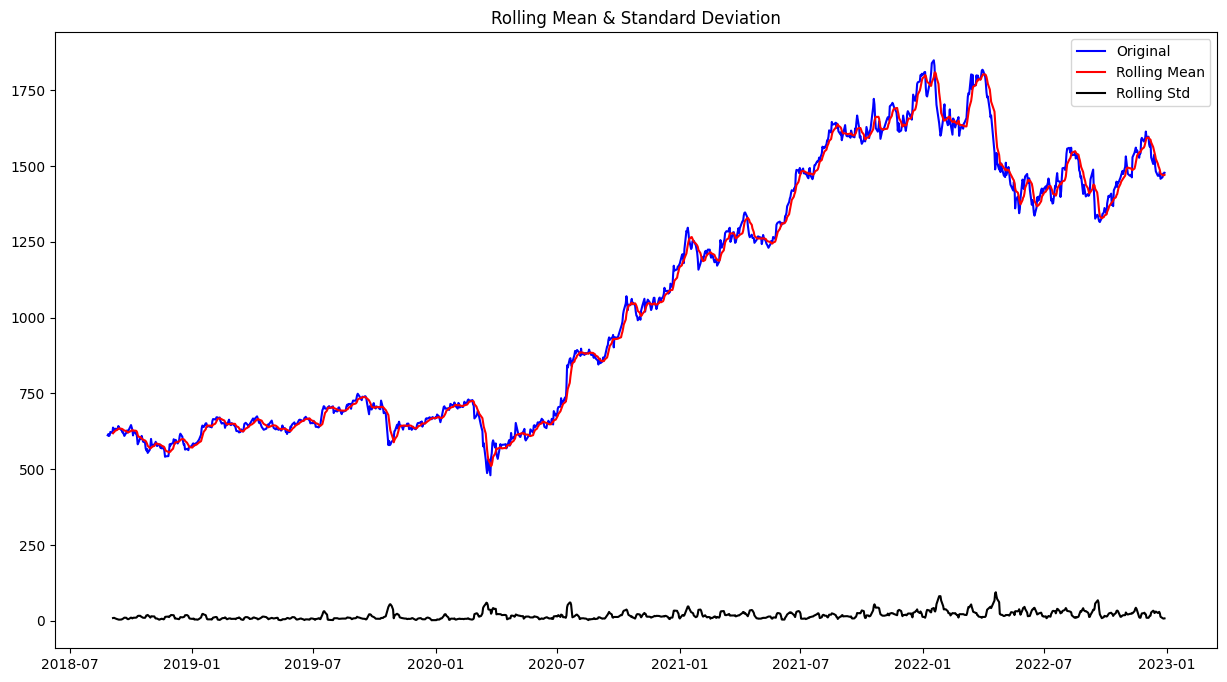

Results of Dickey-Fuller Test:
Test Statistic                   -0.828743
p-value                           0.810533
#Lags Used                        0.000000
Number of Observations Used    1072.000000
Critical Value (1%)              -3.436465
Critical Value (5%)              -2.864240
Critical Value (10%)             -2.568208
dtype: float64 



In [ ]:
test_stationarity(train['Adj Close'])

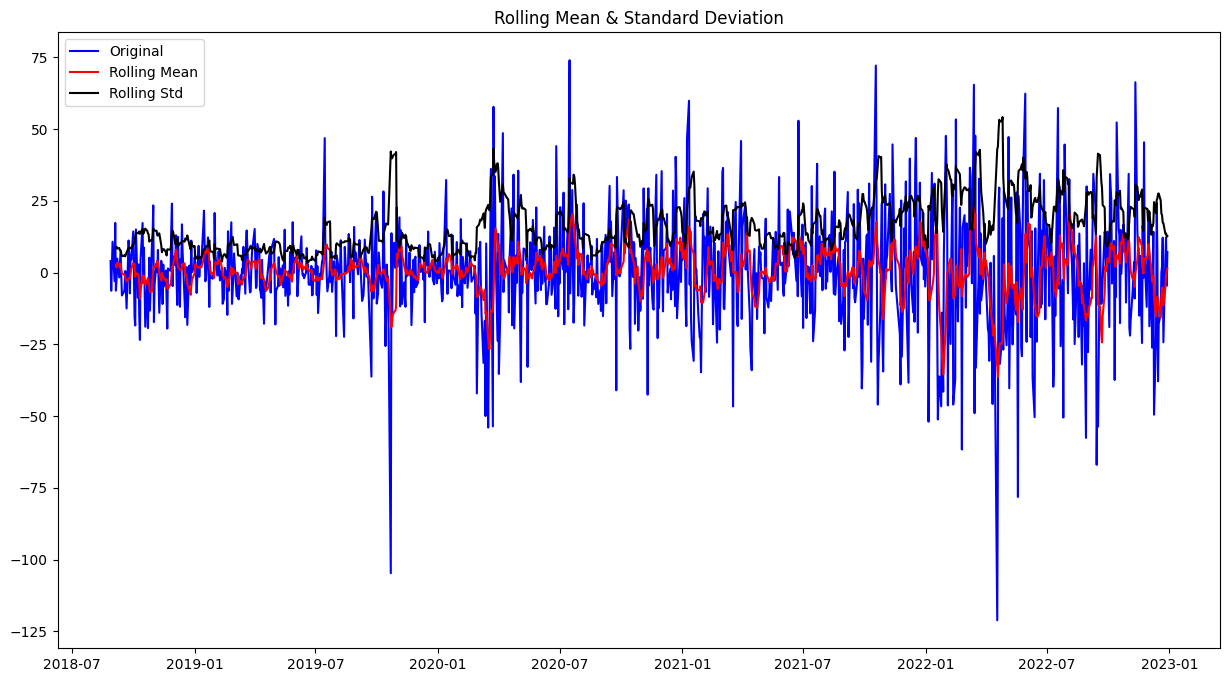

Results of Dickey-Fuller Test:
Test Statistic                  -31.619217
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1071.000000
Critical Value (1%)              -3.436470
Critical Value (5%)              -2.864242
Critical Value (10%)             -2.568209
dtype: float64 



In [ ]:
test_stationarity(train['Adj Close'].diff().dropna())

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 162 entries, 2022-12-30 to 2023-08-25
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  162 non-null    float64
dtypes: float64(1)
memory usage: 2.5 KB


In [ ]:
import itertools
p = q = range(0, 5)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (0, 1, 4)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (1, 1, 4)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (2, 1, 4)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)
Model: (3, 1, 4)
Model: (4, 1, 0)
Model: (4, 1, 1)
Model: (4, 1, 2)
Model: (4, 1, 3)
Model: (4, 1, 4)


In [ ]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

for param in pdq:
    ARIMA_model = ARIMA(train['Adj Close'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:9349.805960693851
ARIMA(0, 1, 1) - AIC:9350.439162199767
ARIMA(0, 1, 2) - AIC:9352.19487085086
ARIMA(0, 1, 3) - AIC:9354.111062632299
ARIMA(0, 1, 4) - AIC:9356.062750251114
ARIMA(1, 1, 0) - AIC:9350.481618405789
ARIMA(1, 1, 1) - AIC:9347.923071458394
ARIMA(1, 1, 2) - AIC:9349.922855887711
ARIMA(1, 1, 3) - AIC:9351.626495205783
ARIMA(1, 1, 4) - AIC:9352.668156823947
ARIMA(2, 1, 0) - AIC:9352.215063626163
ARIMA(2, 1, 1) - AIC:9349.92284667171
ARIMA(2, 1, 2) - AIC:9351.879689514948
ARIMA(2, 1, 3) - AIC:9351.035840023695
ARIMA(2, 1, 4) - AIC:9352.554894837212
ARIMA(3, 1, 0) - AIC:9354.155831401204
ARIMA(3, 1, 1) - AIC:9356.155234993408
ARIMA(3, 1, 2) - AIC:9353.86814551142
ARIMA(3, 1, 3) - AIC:9355.719448499693
ARIMA(3, 1, 4) - AIC:9348.620581962823
ARIMA(4, 1, 0) - AIC:9356.154570353156
ARIMA(4, 1, 1) - AIC:9352.560268234414
ARIMA(4, 1, 2) - AIC:9355.56835898761
ARIMA(4, 1, 3) - AIC:9357.75783562836
ARIMA(4, 1, 4) - AIC:9357.84799424373


In [ ]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
6,"(1, 1, 1)",9347.923071
19,"(3, 1, 4)",9348.620582
0,"(0, 1, 0)",9349.805961
11,"(2, 1, 1)",9349.922847
7,"(1, 1, 2)",9349.922856
1,"(0, 1, 1)",9350.439162
5,"(1, 1, 0)",9350.481618
13,"(2, 1, 3)",9351.035840
8,"(1, 1, 3)",9351.626495
12,"(2, 1, 2)",9351.879690


In [ ]:
auto_ARIMA = ARIMA(train['Adj Close'], order=(1,1,1))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 1073
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4670.962
Date:                Sun, 10 Sep 2023   AIC                           9347.923
Time:                        08:24:30   BIC                           9362.855
Sample:                             0   HQIC                          9353.579
                               - 1073                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8455      0.083    -10.246      0.000      -1.007      -0.684
ma.L1          0.8851      0.073     12.172      0.000       0.743       1.028
sigma2       356.5907      9.227     38.645      0.0

In [ ]:
predicted_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [ ]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Adj Close'],predicted_ARIMA,squared=False)
print(rmse)

146.30165700283465


In [ ]:
train['Adj Close'].mean()

1070.9307881267475

In [ ]:
resultsDf = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['ARIMA(1, 1, 1)'])

resultsDf

,Test RMSE
"ARIMA(1, 1, 1)",146.301657


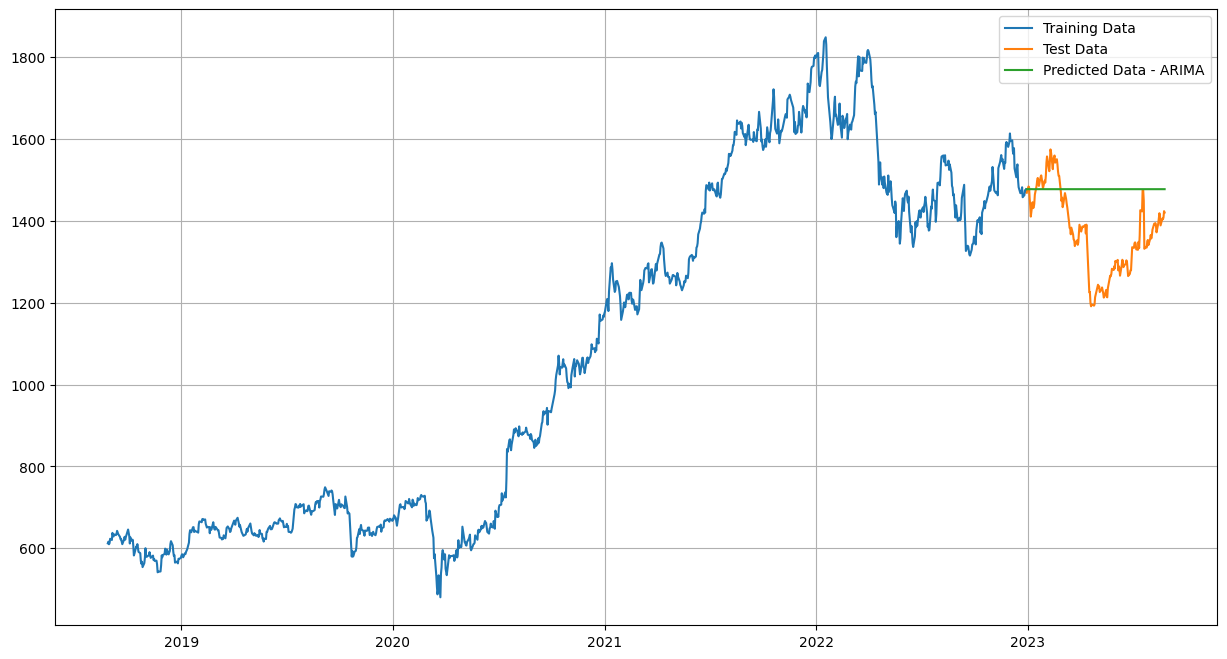

In [ ]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,predicted_ARIMA,label='Predicted Data - ARIMA')
plt.legend(loc='best')
plt.grid();

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
df_new.tail()

,Adj Close
Date,
2023-08-21,1405.400024
2023-08-22,1403.750000
2023-08-23,1407.949951
2023-08-24,1423.599976
2023-08-25,1420.099976


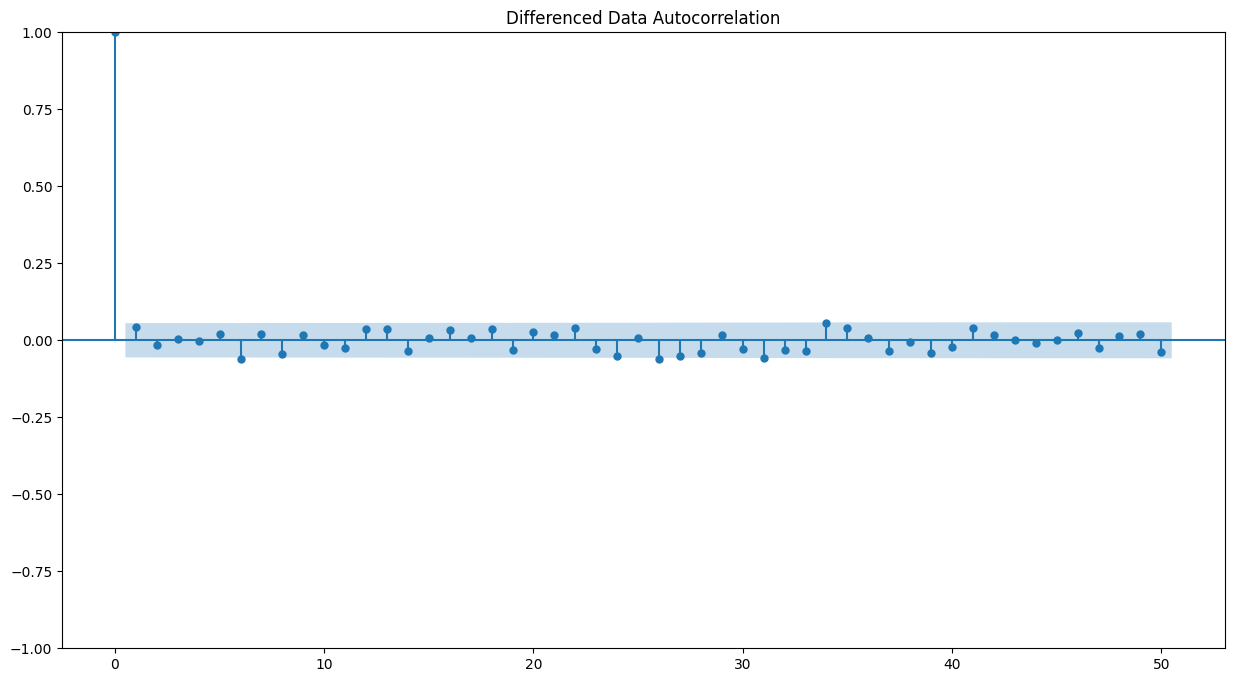

In [ ]:
plot_acf(df_new['Adj Close'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

In [ ]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [ ]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [ ]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Adj Close'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:9342.040460528973
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:9292.578502691385
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:9246.276489582993
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:9300.196466060694
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:9294.222535195606
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:9248.127831199094
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:9254.55091430345
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:9256.32444037355
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:9249.010371288368
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:9334.837385625073
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:9285.046184418017
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:9238.723050887667
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:9300.401669870775
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:9286.70410910335
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:9240.595693456275
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:9254.803715110109
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:9256.567529365562
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:9241.494498334596
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AIC:9328.855833204

In [ ]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
20,"(0, 1, 2)","(0, 0, 2, 6)",9232.646840
47,"(1, 1, 2)","(0, 0, 2, 6)",9232.852840
23,"(0, 1, 2)","(1, 0, 2, 6)",9234.481285
26,"(0, 1, 2)","(2, 0, 2, 6)",9234.713084
50,"(1, 1, 2)","(1, 0, 2, 6)",9234.737382


In [ ]:
### Let's create exogeneous variables

ex_train=train1[['High','Low']]
ex_test=test1[['High','Low']]
ex_train.tail()

,High,Low
Date,,
2022-12-23,1509.900024,1493.000000
2022-12-26,1509.900024,1496.349976
2022-12-27,1521.449951,1497.500000
2022-12-28,1524.949951,1498.500000
2022-12-29,1521.300049,1501.000000


In [ ]:
dfObj3 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
dfObj3

,param,seasonal,AIC


In [ ]:
## Let's first use SARIMAX with exogenous variable
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in model_pdq:
        mod = sm.tsa.statespace.SARIMAX(train['Adj Close'],exog=ex_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

        results_SARIMAX = mod.fit()
        print('SARIMA{}{} - AIC:{}'.format(param, param_seasonal, results_SARIMAX.aic))
        dfObj3 = dfObj3.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMAX.aic}, ignore_index=True)

SARIMA(0, 1, 0)(0, 0, 0, 6) - AIC:8191.787612295585
SARIMA(0, 1, 0)(0, 0, 1, 6) - AIC:8148.159581166911
SARIMA(0, 1, 0)(0, 0, 2, 6) - AIC:8108.171192527097
SARIMA(0, 1, 0)(1, 0, 0, 6) - AIC:8155.661946637401
SARIMA(0, 1, 0)(1, 0, 1, 6) - AIC:8149.757035835706
SARIMA(0, 1, 0)(1, 0, 2, 6) - AIC:8110.1055323071705
SARIMA(0, 1, 0)(2, 0, 0, 6) - AIC:8114.915270299959
SARIMA(0, 1, 0)(2, 0, 1, 6) - AIC:8116.912392477621
SARIMA(0, 1, 0)(2, 0, 2, 6) - AIC:8112.072382441851
SARIMA(0, 1, 1)(0, 0, 0, 6) - AIC:7572.755133540253
SARIMA(0, 1, 1)(0, 0, 1, 6) - AIC:7535.553812935251
SARIMA(0, 1, 1)(0, 0, 2, 6) - AIC:7498.770346128129
SARIMA(0, 1, 1)(1, 0, 0, 6) - AIC:7548.587497281656
SARIMA(0, 1, 1)(1, 0, 1, 6) - AIC:7537.361636185526
SARIMA(0, 1, 1)(1, 0, 2, 6) - AIC:7500.604197581988
SARIMA(0, 1, 1)(2, 0, 0, 6) - AIC:7511.325029869456
SARIMA(0, 1, 1)(2, 0, 1, 6) - AIC:7513.2636707697475
SARIMA(0, 1, 1)(2, 0, 2, 6) - AIC:7502.451988921066
SARIMA(0, 1, 2)(0, 0, 0, 6) - AIC:7563.281609254878
SARIMA(0, 

In [ ]:
dfObj3.sort_values(by=['AIC'])

,param,seasonal,AIC
47,"(1, 1, 2)","(0, 0, 2, 6)",7487.662054
74,"(2, 1, 2)","(0, 0, 2, 6)",7487.943511
20,"(0, 1, 2)","(0, 0, 2, 6)",7488.476942
50,"(1, 1, 2)","(1, 0, 2, 6)",7489.466202
77,"(2, 1, 2)","(1, 0, 2, 6)",7489.608221
...,...,...,...
7,"(0, 1, 0)","(2, 0, 1, 6)",8116.912392
1,"(0, 1, 0)","(0, 0, 1, 6)",8148.159581
4,"(0, 1, 0)","(1, 0, 1, 6)",8149.757036
3,"(0, 1, 0)","(1, 0, 0, 6)",8155.661947


In [ ]:
## SARIMAX(1, 1, 2)(0, 0, 2, 6)
mod = sm.tsa.statespace.SARIMAX(train['Adj Close'],exog=ex_train,
                                order=(1,1,2),
                                seasonal_order=(0,0,2,6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                     
Dep. Variable:                         Adj Close   No. Observations:                 1073
Model:             SARIMAX(1, 1, 2)x(0, 0, 2, 6)   Log Likelihood               -3735.831
Date:                           Sun, 10 Sep 2023   AIC                           7487.662
Time:                                   08:35:30   BIC                           7527.368
Sample:                                        0   HQIC                          7502.712
                                          - 1073                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
High           0.4447      0.014     32.796      0.000       0.418       0.471
Low            0.4916      0.013     38.692

In [ ]:
pred_SARIMAX = results.get_forecast(steps=len(test),exog=ex_test)
pred_SARIMAX.predicted_mean

1073    1477.513915
1074    1477.059223
1075    1484.989167
1076    1467.514454
1077    1450.031963
           ...     
1230    1365.854898
1231    1370.102767
1232    1379.218397
1233    1387.301942
1234    1384.668662
Name: predicted_mean, Length: 162, dtype: float64

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [ ]:
rmse = sqrt(mean_squared_error(test['Adj Close'],pred_SARIMAX.predicted_mean))
print(rmse)

20.11289017643818


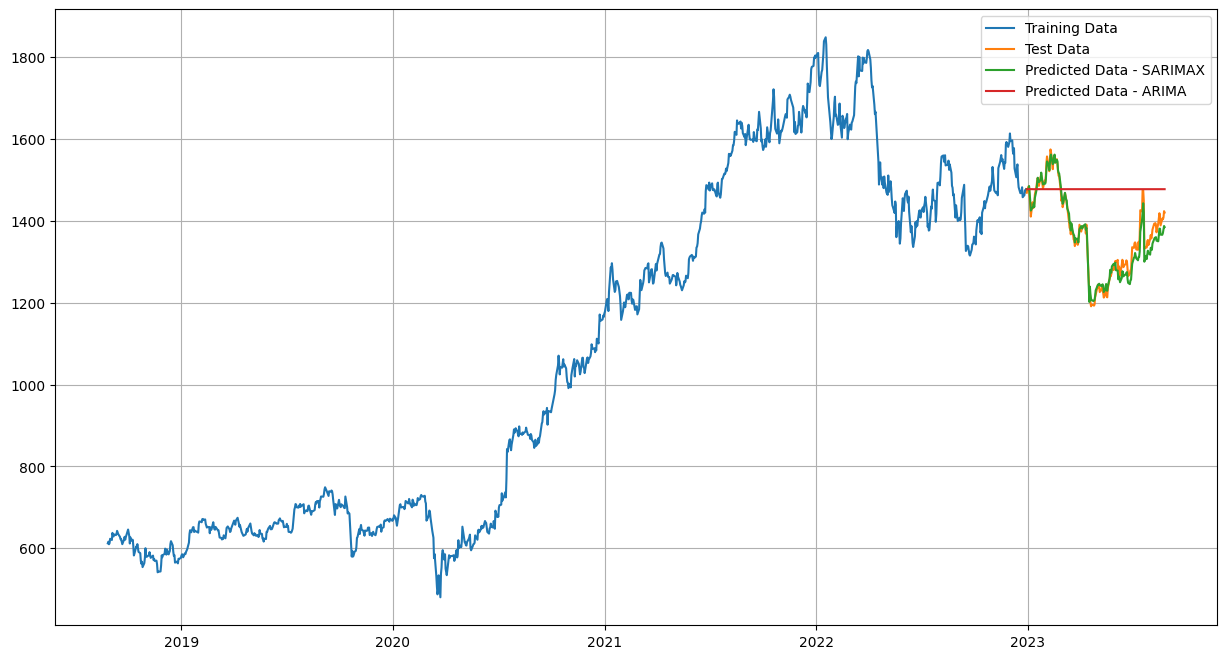

In [ ]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,pred_SARIMAX.predicted_mean,label='Predicted Data - SARIMAX')
plt.plot(test.index,predicted_ARIMA,label='Predicted Data - ARIMA')
plt.legend(loc='best')
plt.grid();